In [115]:
import pandas as pd
import numpy as np
import sklearn.svm as svm
import matplotlib.pyplot as plt

In [171]:
df = pd.read_csv("Medicare_Provider_Utilization_and_Payment_Data__Physician_and_Other_Supplier_PUF_CY2017 (1).csv")
df["Total Earned"] = df["Number of Services"] * df["Average Medicare Payment Amount"]
df = df.iloc[:,[0, -1]].copy()
df = df.groupby("National Provider Identifier").sum()
df

,Total Earned
National Provider Identifier,
1003015504,6.548790e+03
1003056516,1.155211e+05
1003072786,1.080334e+04
1003101874,4.371948e+04
1003808494,1.596808e+05
...,...
1992804504,3.567486e+06
1992863443,4.482730e+03
1992876155,5.325915e+05


In [172]:
df2 = pd.read_csv("Autoencoder 2017 Dataset.csv")
df2 = df2[df2["Fraud"].notnull()].fillna(0)
df2

,Fraud,0191T,0474T,10060,11000,11100,11440,11441,11642,11900,...,J3490,J3590,J7312,J7313,J7611,J7999,J9035,J9190,J9280,Q2037
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1952,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1954,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
df3 = pd.read_csv("Autoencoder 2017 Transformed Number of Services.csv")
df3 = df3[df3["Fraud"].notnull()].fillna(0)
# df3 = pd.concat([df3, df2["Fraud"]], axis = 1)
df3 = df3[df3["National Provider Identifier"].isin(list(df.index))]
df3 = df3.set_index("National Provider Identifier")
df3

,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,...,J3490,J3590,J7312,J7313,J7611,J7999,J9035,J9190,J9280,Q2037
National Provider Identifier,,,,,,,,,,,,,,,,,,,,,
1.003016e+09,SAWUSCH,MARK,R,M.D.,M,I,910 VIA DE LA PAZ STE 208,0,PACIFIC PALISADES,902723592.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.003057e+09,KHEMICHIAN,ARBI,0,MD,M,I,21320 HAWTHORNE BLVD. #104,0,TORRANCE,90503.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.003073e+09,ALASIL,TAREK,0,MD,M,I,100 E CALIFORNIA BLVD,0,PASADENA,911053205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0
1.003102e+09,KIM,GRACE,L,MD,F,I,850 HEALTH SCIENCES RD,0,IRVINE,926974375.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.003808e+09,CHANG,ANDREW,0,M.D.,M,I,18350 ROSCOE BLVD,SUITE 101,NORTHRIDGE,913254109.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.992805e+09,PIERAMICI,DANTE,0,M.D.,M,I,515 E MICHELTORENA ST,SUITE C,SANTA BARBARA,931032257.0,...,0.0,0.0,0.0,0.0,0.0,176.0,0.0,0.0,0.0,0.0
1.992863e+09,MANCHE,EDWARD,0,M.D.,M,I,300 PASTEUR DR,0,STANFORD,943052200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.992876e+09,MARSICO,NICHOLAS,P,M.D.,M,I,420 E 3RD ST,SUITE 603,LOS ANGELES,900131644.0,...,0.0,0.0,0.0,0.0,0.0,0.0,347.0,0.0,0.0,0.0


In [174]:
df3

,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,...,J3490,J3590,J7312,J7313,J7611,J7999,J9035,J9190,J9280,Q2037
National Provider Identifier,,,,,,,,,,,,,,,,,,,,,
1.003016e+09,SAWUSCH,MARK,R,M.D.,M,I,910 VIA DE LA PAZ STE 208,0,PACIFIC PALISADES,902723592.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.003057e+09,KHEMICHIAN,ARBI,0,MD,M,I,21320 HAWTHORNE BLVD. #104,0,TORRANCE,90503.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.003073e+09,ALASIL,TAREK,0,MD,M,I,100 E CALIFORNIA BLVD,0,PASADENA,911053205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0
1.003102e+09,KIM,GRACE,L,MD,F,I,850 HEALTH SCIENCES RD,0,IRVINE,926974375.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.003808e+09,CHANG,ANDREW,0,M.D.,M,I,18350 ROSCOE BLVD,SUITE 101,NORTHRIDGE,913254109.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.992805e+09,PIERAMICI,DANTE,0,M.D.,M,I,515 E MICHELTORENA ST,SUITE C,SANTA BARBARA,931032257.0,...,0.0,0.0,0.0,0.0,0.0,176.0,0.0,0.0,0.0,0.0
1.992863e+09,MANCHE,EDWARD,0,M.D.,M,I,300 PASTEUR DR,0,STANFORD,943052200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.992876e+09,MARSICO,NICHOLAS,P,M.D.,M,I,420 E 3RD ST,SUITE 603,LOS ANGELES,900131644.0,...,0.0,0.0,0.0,0.0,0.0,0.0,347.0,0.0,0.0,0.0


In [196]:
df3
df4 = pd.concat([df, df3["Fraud"]], axis = 1)
df4 = df4.sort_values("Fraud")
df4.tail(n = 10)

,Total Earned,Fraud
National Provider Identifier,,
1.003816e+09,4.757569e+05,1.0
1.275627e+09,8.097193e+05,1.0
1.386989e+09,1.059614e+06,1.0
1.821273e+09,1.244842e+06,1.0
1.528055e+09,5.682371e+05,1.0
1.114914e+09,1.883004e+06,1.0
1.518047e+09,7.134682e+05,1.0
1.013011e+09,6.006650e+05,1.0
1.134233e+09,1.662968e+06,1.0


In [197]:
df5 = df4.iloc[:-6,:].copy()
df5 = df5.iloc[20:,:].copy()
X = df5.iloc[:,0]
y = df5.iloc[:,1]
validation_set_neg = df4.iloc[:20,0].copy().values.reshape(-1, 1)
validation_set_pos = df4.iloc[-6:,0].copy().values.reshape(-1, 1)
X = np.array(X).reshape(-1, 1)
X

array([[ 345171.6399998 ],
       [   3654.21999999],
       [  58118.48000001],
       ...,
       [ 809719.290004  ],
       [1059613.72999671],
       [1244842.48999626]])

1.0 0.6


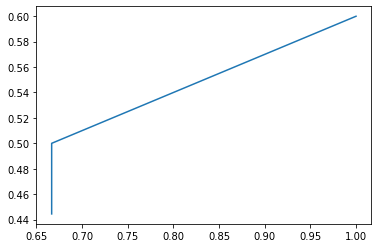

In [198]:
pres = []
recall = []
for i in np.arange(0.01, 2, 0.1):
    model = svm.SVC(C = i, class_weight = "balanced", gamma = 'scale')
    model.fit(X, y)
    pred_n = model.predict(validation_set_neg)
    pred_p = model.predict(validation_set_pos)
    if sum(pred_p) + sum(pred_n) > 0:
        pres.append(sum(pred_p)/(sum(pred_p) + sum(pred_n)))
        recall.append(sum(pred_p)/len(pred_p))
total = [pres[i] + recall[i] for i in range(len(pres))]
print(recall[np.argmax(total)], pres[np.argmax(total)])
plt.plot(recall, pres)

In [199]:
# Unsupervised outlier detection with both types of entries
model = svm.OneClassSVM(gamma = 'scale')
model.fit(X)
pred_n = model.predict(validation_set_neg)
pred_p = model.predict(validation_set_pos)
recall = sum([1 for i in pred_p if i == -1])/len(pred_p)
pres = sum([1 for i in pred_p if i == -1])/(sum([1 for i in pred_p if i == -1]) + sum([1 for i in pred_n if i == -1]))
print(recall, pres)

1.0 0.4


In [164]:
# Unsupervised outlier detection with only non-fraud entries
df6 = df4[df4["Fraud"] != 1].copy()
df6 = df6.iloc[21:,:]
X1 = df4.iloc[:,0].copy()
validation_set_neg = df4.iloc[:21,0].copy()
validation_set_pos = df4[df4["Fraud"] == 1].iloc[:,1:].copy()
model = svm.OneClassSVM(gamma = 'scale')
model.fit(X1)
pred_n = model.predict(validation_set_neg)
pred_p = model.predict(validation_set_pos)
print(pred_n)
recall = sum([1 for i in pred_p if i == -1])/len(pred_p)
pres = sum([1 for i in pred_p if i == -1])/(sum([1 for i in pred_p if i == -1]) + sum([1 for i in pred_n if i == -1]))
print(recall, pres)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
1.0 0.38235294117647056
